In [15]:
import numpy as np
import scipy
import cv2
from PIL import Image
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.ndimage as ndimage
import random, os


### Get Images

26_01_22_06_344.png


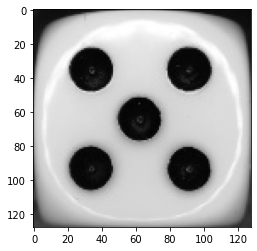

In [43]:
path = r"./dices/normal/"

#Choose randomly a file

random_filename = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
print(random_filename)

img_original = cv2.imread(path+random_filename)

plt.imshow(img_original)
plt.show()

### Translate Images to left

In [44]:
def translate_left(img, roll=True):
    shift=10
    img = img.copy()

    left_slice = img[:, :shift].copy()
    img[:, :-shift] = img[:, shift:]
    if roll:
        img[:, -shift:] = left_slice
    return img

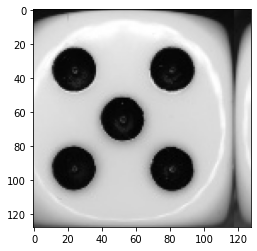

In [45]:
img_translate = translate_left(img_original)

plt.imshow(img_translate)
plt.show()

### Translate Images to down

In [46]:
def translate_down(img, roll=True):
    shift=10
    img = img.copy()
    
    down_slice = img[-shift:, :].copy()
    img[shift:, :] = img[:-shift,:]
    if roll:
        img[:shift, :] = down_slice
    return img

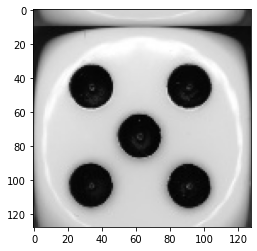

In [47]:
img_translate = translate_down(img_original)

plt.imshow(img_translate)
plt.show()

### Translate Images to right

In [48]:
def translate_right(img, roll=True):
    
    shift=10
    img = img.copy()
    
    right_slice = img[:, -shift:].copy()
    img[:, shift:] = img[:, :-shift]
    if roll:
        img[:,:shift] = np.fliplr(right_slice)
    return img

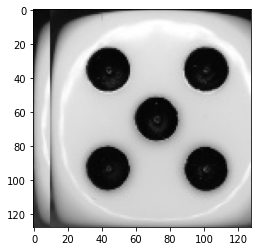

In [49]:
img_translate = translate_right(img_original)

plt.imshow(img_translate)
plt.show()

### Translate Images to up

In [50]:
def translate_up(img, roll=True):
    shift=10
    img = img.copy()
    
    
    upper_slice = img[:shift, :].copy()
    img[:-shift, :] = img[shift:, :]
    if roll:
        img[-shift:,:] = upper_slice
    return img

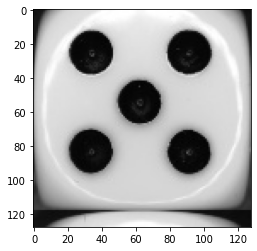

In [51]:
img_translate = translate_up(img_original)

plt.imshow(img_translate)
plt.show()

### Rotate Images

In [52]:
def rotate_img(img):
    
    angle = random.randint(0,360)
    
    img = ndimage.rotate(img, angle, reshape=True)
    
    return img

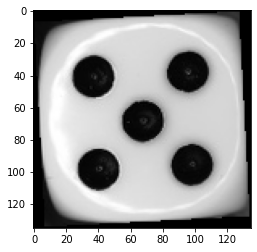

In [53]:
img_rotate = rotate_img(img_original)

plt.imshow(img_rotate)
plt.show()

### Random Noise

In [68]:
def gaussian_noise(img):
   
    row,col,ch= img.shape
    mean = 0
    var = 0.01
    sigma = var**0.9
    
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = img + gauss
    return noisy



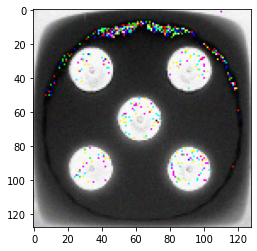

In [69]:
img_gaussian_noise = gaussian_noise(img_original)

plt.imshow((img_gaussian_noise * 255).astype(np.uint8))
plt.show()

### Generate Images



In [40]:
def generate_image(path,name:int):
    
    number = str(name)
    
    random_filename = random.choice([
        x for x in os.listdir(path)
            if os.path.isfile(os.path.join(path, x))
    ])
    
    img_original = cv2.imread(path+random_filename)
    
    img_translate = translate_left(img_original)
    
    cv2.imwrite('./dices/ab/translateleft'+number+'.jpg', img_translate )
    
    img_translate = translate_right(img_original)
    
    cv2.imwrite('./dices/ab/translateright'+number+'.jpg', img_translate )
    
    img_translate = translate_up(img_original)
    
    cv2.imwrite('./dices/ab/translateup'+number+'.jpg', img_translate )
    
    img_translate = translate_down(img_original)
    
    cv2.imwrite('./dices/ab/translatedown'+number+'.jpg', img_translate )

    
    img_rotate = rotate_img(img_original)
    
    cv2.imwrite('./dices/ab/rotate'+number+'.jpg', img_rotate )


    img_gaussian_noise = gaussian_noise1(img_original)
    img_gaussian_noise = (img_gaussian_noise * 255).astype(np.uint8)
    
    cv2.imwrite('./dices/ab/gaussian_noise'+number+'.jpg', img_gaussian_noise )   
    

### Create Synthetic anomalies from abnormal dices

In [ ]:
path = r"./dices/abnormal/"

for i in range(200):
    generate_image(path,i) 